In [1]:
%pip install lightgbm
%pip install scikit-learn

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import sys
sys.path.append('..')
from src import forecasting_model

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


# Huấn luyện Mô hình Dự báo Nhu cầu

Notebook này thực hiện việc huấn luyện mô hình LightGBM để dự báo nhu cầu sản phẩm:

1. **Chuẩn bị dữ liệu**:
   - Load processed data
   - Train/test split theo thời gian
   - Chuẩn hóa features

2. **Huấn luyện mô hình**:
   - Cấu hình hyperparameters
   - Training với early stopping
   - Cross-validation

3. **Đánh giá mô hình**:
   - Metrics (RMSE, MAE, R2)
   - Feature importance
   - Phân tích lỗi

In [3]:
import os
# Load dữ liệu đã xử lý
DATA_DIR = '../data'
demand_df = pd.read_csv(os.path.join(DATA_DIR, 'demand_data.csv'))

print("Shape của dữ liệu:", demand_df.shape)
print("\nCác cột trong dữ liệu:")
print(demand_df.columns.tolist())

# Khởi tạo model
model = forecasting_model.DemandForecaster()

# Chuẩn bị features và target
X, y = model.prepare_data(demand_df, target='demand')

# Chia train/test theo thời gian
print("\nChia dữ liệu train/test...")
X_train, X_test, y_train, y_test = model.train_test_split(X, y, test_weeks=4)
print(f"Train set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

# Chuẩn hóa features
X_train, X_test, categorical_features = model.preprocess_features(X_train, X_test)
print("\nCác categorical features:")
print(categorical_features)

Shape của dữ liệu: (225537, 36)

Các cột trong dữ liệu:
['product_id', 'week', 'demand', 'reorder_count', 'reorder_rate', 'department_id', 'aisle_id', 'product_name', 'demand_lag_1', 'reorder_rate_lag_1', 'demand_lag_2', 'reorder_rate_lag_2', 'demand_lag_3', 'reorder_rate_lag_3', 'demand_lag_4', 'reorder_rate_lag_4', 'demand_rolling_mean_2', 'reorder_rate_rolling_mean_2', 'demand_rolling_std_2', 'demand_rolling_mean_4', 'reorder_rate_rolling_mean_4', 'demand_rolling_std_4', 'day_type', 'is_weekend', 'dept_demand_mean', 'dept_demand_std', 'dept_demand_max', 'dept_reorder_rate_mean', 'aisle_demand_mean', 'aisle_demand_std', 'aisle_demand_max', 'aisle_reorder_rate_mean', 'mean', 'popularity_rank', 'popularity_percentile', 'popularity_category']

Chia dữ liệu train/test...
Train set shape: (179001, 34)
Test set shape: (46536, 34)

Các categorical features:
['product_id', 'department_id', 'aisle_id', 'day_type']

Các categorical features:
['product_id', 'department_id', 'aisle_id', 'day_typ

c:\Users\binhd\Downloads\New folder\notebooks\..\src\forecasting_model.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[numeric_features] = self.scaler.fit_transform(X_train[numeric_features])
c:\Users\binhd\Downloads\New folder\notebooks\..\src\forecasting_model.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[numeric_features] = self.scaler.transform(X_test[numeric_features])


Các cột sẽ được mã hóa tự động: []

✅ Tất cả cột đã là numeric, sẵn sàng train!

Bắt đầu huấn luyện mô hình...


c:\Users\binhd\AppData\Local\Programs\Python\Python312\Lib\site-packages\lightgbm\callback.py:347: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")


[100]	training's rmse: 0.093612
[200]	training's rmse: 0.0915978
[200]	training's rmse: 0.0915978
[300]	training's rmse: 0.0907392
[300]	training's rmse: 0.0907392
[400]	training's rmse: 0.0901312
[400]	training's rmse: 0.0901312
[500]	training's rmse: 0.0877198
[500]	training's rmse: 0.0877198
[600]	training's rmse: 0.0830006
[600]	training's rmse: 0.0830006
[700]	training's rmse: 0.0822213
[700]	training's rmse: 0.0822213
[800]	training's rmse: 0.0801956
[800]	training's rmse: 0.0801956
[900]	training's rmse: 0.0777089
[900]	training's rmse: 0.0777089
[1000]	training's rmse: 0.077228
[1000]	training's rmse: 0.077228

Kết quả đánh giá mô hình:
RMSE: 0.0075
MAE: 0.0006
R2 Score: 0.9829

Kết quả đánh giá mô hình:
RMSE: 0.0075
MAE: 0.0006
R2 Score: 0.9829


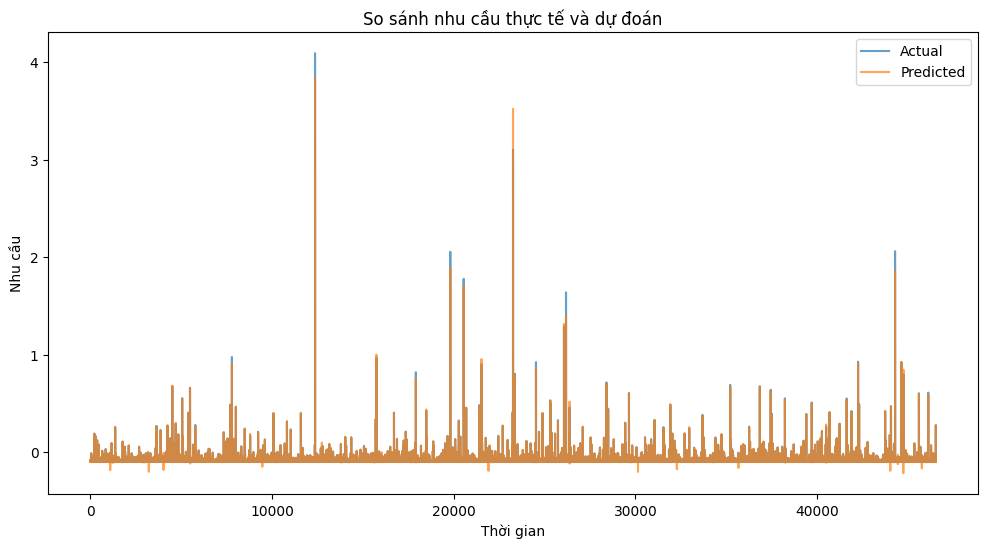

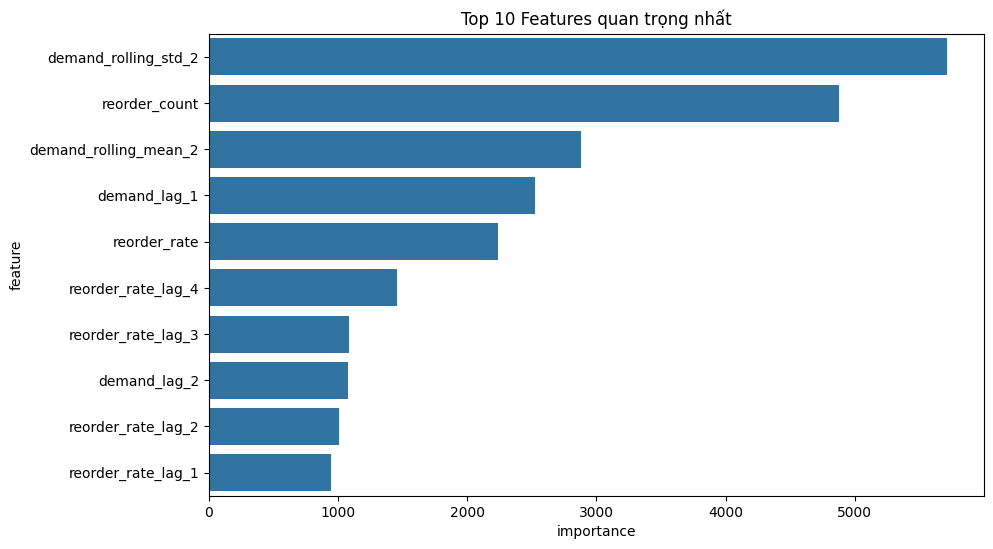

In [15]:
# Tự động ép kiểu cho toàn bộ các cột không phải numeric
non_numeric_cols = X_train.select_dtypes(exclude=['int64', 'float64', 'bool']).columns
print("Các cột sẽ được mã hóa tự động:", non_numeric_cols.tolist())

for col in non_numeric_cols:
    print(f"\nXử lý cột {col}:")
    print(f"Kiểu dữ liệu ban đầu: {X_train[col].dtype}")
    
    # Chuyển sang integer
    try:
        X_train[col] = X_train[col].astype('int64')
        X_test[col] = X_test[col].astype('int64')
        print(f"Đã chuyển thành int64")
    except:
        # Nếu không chuyển được sang int trực tiếp, dùng category codes
        print(f"Không thể chuyển trực tiếp sang int64, dùng category codes")
        X_train[col] = X_train[col].astype(str).astype('category').cat.codes.astype('int64')
        X_test[col] = X_test[col].astype(str).astype('category').cat.codes.astype('int64')
    
    print(f"Kiểu dữ liệu sau xử lý: {X_train[col].dtype}")

# Kiểm tra lại
non_numeric_cols = X_train.select_dtypes(exclude=['int64', 'float64', 'bool']).columns
assert len(non_numeric_cols) == 0, f"Còn cột không phải số: {non_numeric_cols.tolist()}"
print("\n✅ Tất cả cột đã là numeric, sẵn sàng train!")

# Bắt đầu huấn luyện mô hình
print("\nBắt đầu huấn luyện mô hình...")
# Truyền danh sách categorical_features vào hàm train
model.train(X_train, y_train, categorical_features=categorical_features)

# Dự đoán trên tập test
y_pred = model.predict(X_test)

# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nKết quả đánh giá mô hình:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R2 Score: {r2:.4f}")

# Vẽ biểu đồ so sánh giá trị thực tế và dự đoán
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', alpha=0.7)
plt.plot(y_pred, label='Predicted', alpha=0.7)
plt.title('So sánh nhu cầu thực tế và dự đoán')
plt.xlabel('Thời gian')
plt.ylabel('Nhu cầu')
plt.legend()
plt.show()

# Feature importance
importance_df = model.get_feature_importance()
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x='importance', y='feature')
plt.title('Top 10 Features quan trọng nhất')
plt.show()

In [17]:
# Import thêm pickle
import pickle
import json

# Tạo thư mục để lưu kết quả nếu chưa tồn tại
RESULTS_DIR = '../results'
if not os.path.exists(RESULTS_DIR):
    os.makedirs(RESULTS_DIR)

# Lưu mô hình sử dụng pickle
model_path = os.path.join(RESULTS_DIR, 'demand_forecasting_model.pkl')
with open(model_path, 'wb') as f:
    pickle.dump(model, f)
print(f"Đã lưu mô hình tại: {model_path}")

# Lưu kết quả dự đoán
results_df = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred
})
results_path = os.path.join(RESULTS_DIR, 'predictions.csv')
results_df.to_csv(results_path, index=True)
print(f"Đã lưu kết quả dự đoán tại: {results_path}")

# Lưu feature importance
importance_path = os.path.join(RESULTS_DIR, 'feature_importance.csv') 
importance_df.to_csv(importance_path, index=False)
print(f"Đã lưu feature importance tại: {importance_path}")

# Tạo dictionary metrics
metrics_dict = {
    'RMSE': float(rmse),
    'MAE': float(mae),
    'R2': float(r2)
}

# Lưu metrics
metrics_path = os.path.join(RESULTS_DIR, 'metrics.json')
with open(metrics_path, 'w') as f:
    json.dump(metrics_dict, f, indent=4)
print(f"Đã lưu metrics tại: {metrics_path}")

print("\nHoàn thành quá trình huấn luyện và đánh giá mô hình!")

Đã lưu mô hình tại: ../results\demand_forecasting_model.pkl
Đã lưu kết quả dự đoán tại: ../results\predictions.csv
Đã lưu feature importance tại: ../results\feature_importance.csv
Đã lưu metrics tại: ../results\metrics.json

Hoàn thành quá trình huấn luyện và đánh giá mô hình!
